In [1]:
%pylab inline
import matplotlib as mpl
from pygadgetreader import *
from mpl_toolkits.mplot3d import Axes3D

font = {'size':16, 'family':'serif'}
matplotlib.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Nbody1 = loadtxt('LMCMW-H6.txt')
# Function that reads the data from the Analytic integration
def reading_data(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    t = host[:,0] 
    # Defining galactocentric distances and velocities
    x = sat[:,1] - host[:,1] 
    y = sat[:,2] - host[:,2] 
    z = sat[:,3] - host[:,3] 

    vx = sat[:,4] - host[:,4] 
    vy = sat[:,5] - host[:,5] 
    vz = sat[:,6] - host[:,6]        

    Rgal = np.sqrt(x**2.0 + y**2.0 + z**2.0)
    Vgal = np.sqrt(vx**2.0 + vy**2.0 + vz**2.0)
    
    return t, x, y, z, vx, vy, vz, Rgal, Vgal

def ICs(Rgal, cut, x, y, z, vx, vy, vz, t):
    Rcut = np.where(Rgal>=cut)[0]
    return Rgal[Rcut[0]], x[Rcut[0]], y[Rcut[0]], z[Rcut[0]], vx[Rcut[0]], vy[Rcut[0]], vz[Rcut[0]], t[Rcut[0]]
    
def data_host(snap_name):
    host = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_host.txt')
    return host[:,1], host[:,2], host[:,3], host[:,4], host[:,5], host[:,6]

def data_sat(snap_name):
    sat = loadtxt('../../../orbits/data/lmc/'+ snap_name +'_sat.txt')
    return sat[:,1], sat[:,2], sat[:,3], sat[:,4], sat[:,5], sat[:,6]

In [3]:
t1H, x1H, y1H, z1H, vx1H, vy1H, vz1H, Rgal1H, Vgal1H = reading_data('lmc3_MWHern1')
t1NFW, x1NFW, y1NFW, z1NFW, vx1NFW, vy1NFW, vz1NFW, Rgal1NFW, Vgal1NFW = reading_data('lmc3_MWHern1df2')

In [4]:
# Satellite orbits
x1H_sat, y1H_sat, z1H_sat, vx1H_sat, vy1H_sat, vz1H_sat = data_sat('lmc3_MWHern1')
x1N_sat, y1N_sat, z1N_sat, vx1N_sat, vy1N_sat, vz1N_sat = data_sat('lmc3_MWHern1df2')

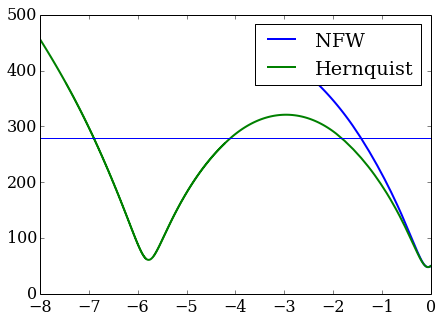

In [5]:
figure(figsize=(7,5))
plot(t1NFW, Rgal1NFW, lw=2.0, label='NFW')
plot(t1H, Rgal1H, lw=2.0, label='Hernquist')
axhline(280)
legend() 

In [6]:
# Finding the ICs
RHi, xHi, yHi, zHi, vxHi, vyHi, vzHi, tiH = ICs(Rgal1H, 280, x1H, y1H, z1H, vx1H, vy1H, vz1H, t1H)
RNi, xNi, yNi, zNi, vxNi, vyNi, vzNi, tiN = ICs(Rgal1NFW, 280, x1NFW, y1NFW, z1NFW, vx1NFW, vy1NFW, vz1NFW, t1NFW)
print 'Hernquist ICs:'
print 'x, y, z, vx, vy, vz, t, R'
print xHi, yHi, zHi, vxHi, vyHi, vxHi, tiH, RHi
print 
print 'NFW ICs:'
print 'x, y, z, vx, vy, vz, t, R'
print xNi, yNi, zNi, vxNi, vyNi, vxNi, tiN, RNi

Hernquist ICs:
x, y, z, vx, vy, vz, t, R
24.33628 272.752518 58.543234 4.336299 -58.767378 4.336299 -1.838 280.024107617

NFW ICs:
x, y, z, vx, vy, vz, t, R
32.288152 278.099582 5.092302 -5.77154 -133.346938 -5.77154 -1.434 280.013988593


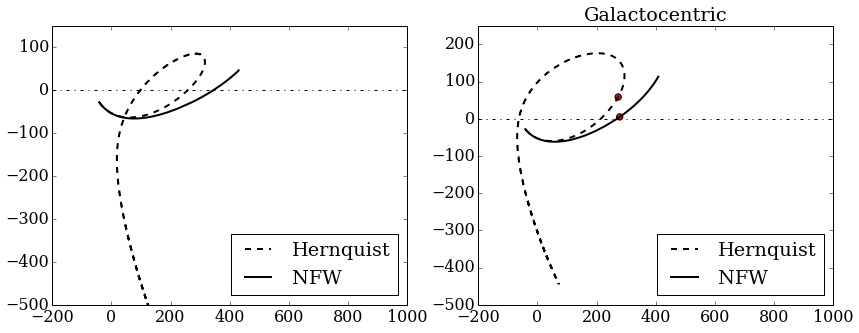

In [7]:
fig = plt.figure(figsize=(14, 5))
subplot(1, 2, 1)
#ax = fig.gca(projection='3d')
plot(y1H_sat, z1H_sat, lw=2, c='k', ls='--', label='Hernquist')#] , A1_hostH[:,3] , label='parametric curve')
plot(y1N_sat, z1N_sat, lw=2, c='k', label='NFW')#] , A1_hostH[:,3] , label='parametric curve')
#ax.plot(A1_satH[:,1] , A1_satH[:,2] , A1_satH[:,3] , label='parametric curve')
#ax.Arrow3D([A1_satH[0,1],-1],[A1_satH[0,2],-4],[A1_satH[3,1],4], mutation_scale=20, lw=1, arrowstyle="-|>", color="k", linestyle="dashed")

xlim(-200, 1000)
ylim(-500, 150)
legend(loc='best')
axhline(0, ls='-.', c='k')

subplot(1, 2, 2)
title('Galactocentric')
#ax = fig.gca(projection='3d')
plot(y1H, z1H, lw=2, c='k', ls='--', label='Hernquist')#] , A1_hostH[:,3] , label='parametric curve')
plot(y1NFW, z1NFW, lw=2, c='k', label='NFW')#] , A1_hostH[:,3] , label='parametric curve')
scatter(yHi, zHi, c='r', s=40)
scatter(yNi, zNi, c='r', s=40)

#ax.plot(A1_satH[:,1] , A1_satH[:,2] , A1_satH[:,3] , label='parametric curve')
#ax.Arrow3D([A1_satH[0,1],-1],[A1_satH[0,2],-4],[A1_satH[3,1],4], mutation_scale=20, lw=1, arrowstyle="-|>", color="k", linestyle="dashed")
xlim(-200, 1000)
ylim(-500, 250)
legend(loc='best')
axhline(0, ls='-.', c='k')

In [8]:
#!python ../CM/orbit_cm.py MWfLMC3H 0 17 ../../data/LMCMW/MWfLMC4/  NFW_MWfLMC3_orbit  1000000 500000

In [9]:
#Function that reads the N-body sumulation orbit
def reading_Nbody(snap_name):
    data = np.loadtxt('orbits/' + snap_name)
    time = data[:,0]
    Rgal = data[:,1]
    x_sat= data[:,2]
    y_sat = data[:,3]
    z_sat = data[:,4]
    x_gal = data[:,5]
    y_gal = data[:,6]
    z_gal = data[:,7]
    Vgal = data[:,8]
    vx_sat = data[:,9]
    vy_sat = data[:,10]
    vz_sat = data[:,11]
    vx_gal = data[:,12]
    vy_gal = data[:,13]
    vz_gal = data[:,14]
    return time, Rgal, x_sat, y_sat, z_sat, x_gal, y_gal, z_gal, Vgal, vx_sat, vy_sat, vz_sat, vx_gal, vy_gal, vz_gal
    


In [20]:
NB_t1, NB_R1, Xlmc1, Ylmc1, Zlmc1, Xmw1, Ymw1, Zmw1,NB_V1, vXlmc1, vYlmc1, vZlmc1, vXmw1, vYmw1, vZmw1 =  reading_Nbody('orb_Herndf1.txt')
NB_t1N, NB_R1N, Xlmc1N, Ylmc1N, Zlmc1N, Xmw1N, Ymw1N, Zmw1N,NB_V1N, vXlmc1N, vYlmc1N, vZlmc1N, vXmw1N, vYmw1N, vZmw1N =  reading_Nbody('orb_H2.txt')


In [21]:
XNB = Xlmc1 - Xmw1
YNB = Ylmc1 - Ymw1
ZNB = Zlmc1 - Zmw1
VXNB = vXlmc1 - vXmw1
VYNB = vYlmc1 - vYmw1
VZNB = vZlmc1 - vZmw1

XNBN = Xlmc1N - Xmw1N
YNBN = Ylmc1N - Ymw1N
ZNBN = Zlmc1N - Zmw1N
VXNBN = vXlmc1N - vXmw1N
VYNBN = vYlmc1N - vYmw1N
VZNBN = vZlmc1N - vZmw1N

(30, 300)

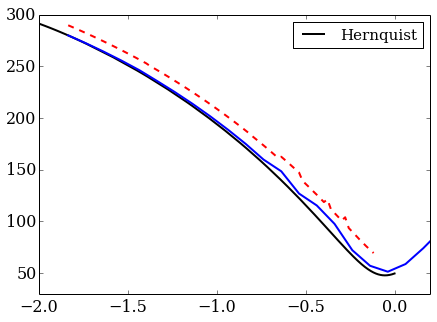

In [22]:
figure(figsize=(7, 5))
plot(t1H, Rgal1H, lw=2.0, label='Hernquist', c='k')
#plot(t1NFW, Rgal1NFW, lw=2.0, label='NFW', c='k', ls='--')
plot(NB_t1 + tiH, NB_R1, lw=2.0, c='b')
plot(NB_t1N + tiH, NB_R1N, lw=2.0, c='r', ls='--')
legend(fontsize=15)
xlim(-2, 0.2)
ylim(30, 300)

In [15]:
print 'Initial values Hernquist'
print Xlmc1[0]-Xmw1[0], Ylmc1[0]-Ymw1[0], Zlmc1[0]-Zmw1[0]
print vXlmc1[0]-vXmw1[0], vYlmc1[0]-vYmw1[0], vZlmc1[0]-vZmw1[0]
print
print 'Initial value NFW'
print Xlmc1N[0]-Xmw1N[0], Ylmc1N[0]-Ymw1N[0], Zlmc1N[0]-Zmw1N[0]
print vXlmc1N[0]-vXmw1N[0], vYlmc1N[0]-vYmw1N[0], vZlmc1N[0]-vZmw1N[0]

Initial values Hernquist
24.11179 277.931731 58.131402
4.322962 -58.521816 -82.39987

Initial value NFW
24.11179 282.931731 58.131402
4.322962 -58.521816 -82.39987


In [16]:
def best_values(x, y, z, vx, vy, vz):
    x_obs = -1
    y_obs = -41
    z_obs = -28
    vx_obs = -57
    vy_obs = -226
    vz_obs = 221
    Robs = np.sqrt((x_obs-x)**2.0 + (y_obs-y)**2.0 + (z_obs-z)**2.0)
    index = np.where(Robs == min(Robs))[0]
    return x[index], y[index], z[index], vx[index], vy[index], vz[index]
    

In [19]:
#Hernquist
print "Best values Hernquist:"
xhb, yhb, zhb, vxhb, vyhb, vzhb = best_values(XNB, YNB, ZNB, VXNB, VYNB,VZNB)
print xhb, yhb, zhb, vxhb, vyhb, vzhb

Best values Hernquist:
[-2.798402] [-54.062132] [-22.958092] [-62.822627] [-233.001137] [ 225.624989]


In [18]:
#NFW
print "Best values NFW:"
xnb, ynb, znb, vxnb, vynb, vznb = best_values(XNBN, YNBN, ZNBN, VXNBN, VYNBN,VZNBN)
print xnb, ynb, znb, vxnb, vynb, vznb

Best values NFW:
[-2.256318] [-5.948759] [-0.087785] [-149.815805] [-307.426432] [ 24.347045]


In [364]:
# Corrected ICs:
print x1[IC1] + (x1[IC1] - (Xlmc1[0]-Xmw1[0]))
print y1[IC1] + (y1[IC1] - (Ylmc1[0]-Ymw1[0]))
print z1[IC1] + (z1[IC1] - (Zlmc1[0]-Zmw1[0]))
print vx1[IC1] + (vx1[IC1] - (vXlmc1[0]-vXmw1[0]))
print vy1[IC1] + (vy1[IC1] - (vYlmc1[0]-vYmw1[0]))
print vz1[IC1] + (vz1[IC1] - (vZlmc1[0]-vZmw1[0]))

44.647101
256.79815
-103.11502
-25.675155
-204.199056
10.331358


In [365]:
t1 = t1 - dt

197.546798 201.791604891


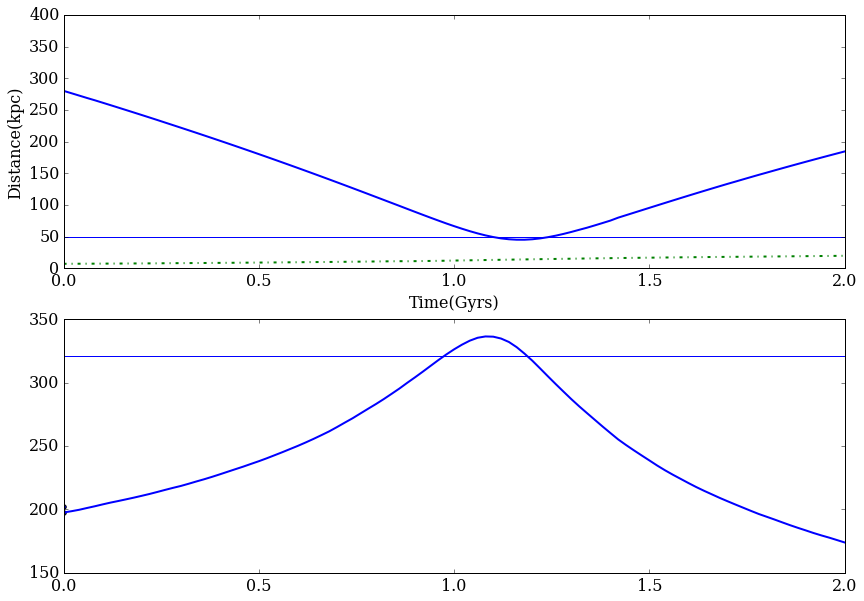

In [366]:
figure(figsize=(14, 10))
plt.subplot(2, 1, 1)
#plot(t1, Rgal1, lw=2)
plot(NB_t1, NB_R1, lw=2, ls='-')
plot(NB_t1, np.sqrt(Xmw1**2 + Ymw1**2 + Zmw1**2), lw=2, ls='-.')
plt.ylabel('Distance(kpc)')
plt.xlabel('Time(Gyrs)')
#xlim(0, 2)
ylim(0, 400)
plt.axhline(np.sqrt(x1[0]**2 + y1[0]**2 + z1[0]**2))
plt.subplot(2, 1, 2)
#plot(t1, Vgal1)
plot(NB_t1, NB_V1, lw=2, ls='-')
xlim(0, 2)
ylim(150, 350)
print NB_V1[0], Vgal1[IC1]
scatter(0, Vgal1[IC1])
scatter(0, NB_V1[0])
plt.axhline(np.sqrt(vx1[0]**2 + vy1[0]**2 + vz1[0]**2))

In [367]:
RLMC = np.sqrt((XNB - x1[0])**2 + (YNB - y1[0])**2 + (ZNB - z1[0])**2)
VLMC = np.sqrt((VXNB - vx1[0])**2 + (VYNB - vy1[0])**2 + (VZNB - vz1[0])**2)
peri1 = where(VLMC == min(VLMC))

In [368]:
print 'Galactocentric Distances of the Nbody Sim at present day'
print Xlmc1[peri1]-Xmw1[peri1], Ylmc1[peri1]-Ymw1[peri1], Zlmc1[peri1]-Zmw1[peri1]
print 'Galactocentric Velocities of the Nbody Sim at present day'
print vXlmc1[peri1]-vXmw1[peri1], vYlmc1[peri1]-vYmw1[peri1], vZlmc1[peri1]-vZmw1[peri1]
print NB_t1[peri1]

Galactocentric Distances of the Nbody Sim at present day
[ 1.436735] [-40.775523] [-24.053635]
Galactocentric Velocities of the Nbody Sim at present day
[-43.74222] [-223.394928] [ 212.133295]
[ 1.22]


In [369]:
#print 'Galactocentric Distances of the Nbody Sim at Peri'
#print Xlmc05[peri05]-Xmw1[peri05], Ylmc1[peri05]-Ymw1[peri05], Zlmc1[peri05]-Zmw1[peri05]
#print 'Galactocentric Velocities of the Nbody Sim at Peri'
#print vXlmc05[peri05]-vXmw1[peri05], vYlmc1[peri05]-vYmw1[peri05], vZlmc1[peri05]-vZmw1[peri05]

In [370]:
print 'Galactocentric Distances of the LMC at actual position Analytic'
print x1[0], y1[0], z1[0]
print vx1[0], vy1[0], vz1[0]

Galactocentric Distances of the LMC at actual position Analytic
-1.0 -41.0 -28.0
-57.0 -226.0 221.0


In [371]:
print 'MW CM displacement:'
print Xmw1[peri1], Ymw1[peri1], Zmw1[peri1]

MW CM displacement:
[ 7.273064] [ 9.882116] [-7.962931]


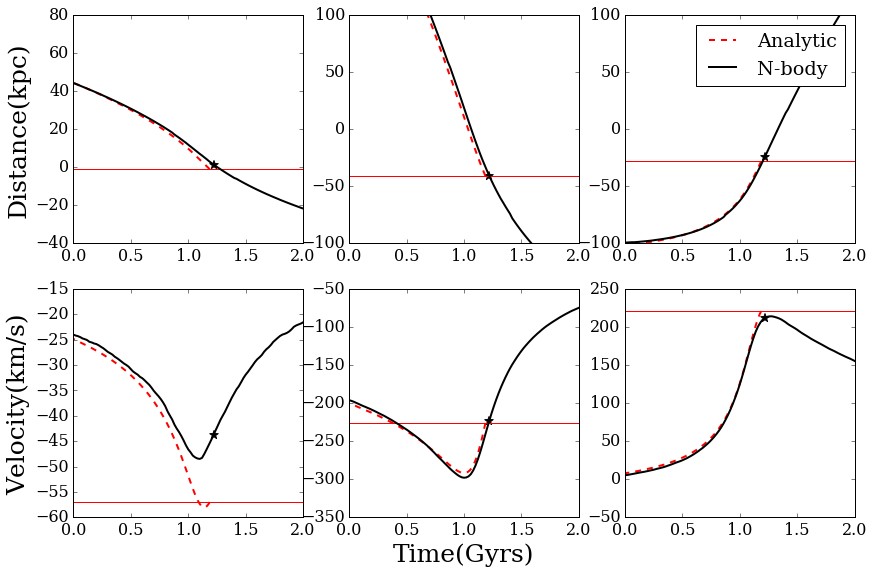

In [375]:
figure(figsize(14, 9))
plt.subplot(2, 3, 1)
plot(t1, x1, lw=2, ls='--', c='r')
#plot(t05, x05, lw=2, ls='--', c='b')
plt.axhline(x1[0], c='r')
scatter(NB_t1[peri1], Xlmc1[peri1]-Xmw1[peri1], marker='*', s=80, c='k')
plot(NB_t1, Xlmc1-Xmw1, lw=2, label='Full Df', c='k')
#plot(NB_t05, Xmw05-Xlmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)
plt.ylabel('Distance(kpc)', fontsize=25)

plt.subplot(2, 3, 2)
plot(t1, y1, lw=2, ls='--', c='r')
plt.axhline(y1[0], c='r')
scatter(NB_t1[peri1], Ylmc1[peri1]-Ymw1[peri1], marker='*', c='k', s=80)

#plot(t05, y05, lw=2, ls='--', c='b')
plot(NB_t1, Ylmc1-Ymw1, lw=2, label='Full Df', c='k')
#plot(NB_t05, Ymw05-Ylmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)
ylim(-100, 100)

plt.subplot(2, 3, 3)
plot(t1, z1, lw=2, label='Analytic', c='r', ls='--')
plt.axhline(z1[0], c='r')
scatter(NB_t1[peri1], Zlmc1[peri1]-Zmw1[peri1], marker='*', c='k', s=80)
#plot(t05, z05, lw=2, ls='--', c='b')
plot(NB_t1, Zlmc1-Zmw1, lw=2, label='N-body', c='k')
#plot(NB_t05, Zmw05-Zlmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)
ylim(-100, 100)
legend()

plt.subplot(2, 3, 4)
plot(t1, vx1, lw=2, ls='--', c='r')
plt.axhline(vx1[0], c='r')
scatter(NB_t1[peri1], vXlmc1[peri1]-vXmw1[peri1], marker='*', c='k', s=80)
#plot(t05, vx05, lw=2, ls='--', c='b')
plot(NB_t1, vXlmc1-vXmw1, lw=2, label='Full Df', c='k')
#plot(NB_t05, vXmw05-vXlmc05, lw=2, label='0.5 DF', c='b')
plt.ylabel('Velocity(km/s)', fontsize=25)
xlim(0, 2)

plt.subplot(2, 3, 5)
plot(t1, vy1, lw=2, ls='--', c='r')
plt.axhline(vy1[0], c='r')
#plot(t05, vy05, lw=2, ls='--', c='b')
plot(NB_t1, vYlmc1-vYmw1, lw=2, label='Full Df', c='k')
scatter(NB_t1[peri1], vYlmc1[peri1]-vYmw1[peri1], marker='*', c='k', s=80)
#plot(NB_t05, vYmw05-vYlmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)

plt.xlabel('Time(Gyrs)', fontsize=25)
plt.subplot(2, 3, 6)
plot(t1, vz1, lw=2, ls='--', c='r')
plt.axhline(vz1[0], c='r')
#plot(t05, vz05, lw=2, ls='--', c='b')
plot(NB_t1, vZlmc1-vZmw1, lw=2, label='Full Df', c='k')
scatter(NB_t1[peri1], vZlmc1[peri1]-vZmw1[peri1], marker='*', c='k', s=80)
#plot(NB_t05, vZmw05-vZlmc05, lw=2, label='0.5 DF', c='b')
xlim(0, 2)
savefig('a1ICsH6.png', bbox_inches='tight')